#  Проста лінійна регресія з нуля на Python

У цьому проєкті реалізовано базову лінійну регресію **без використання бібліотек машинного навчання**, таких як `sklearn`.

###  Цілі:
- Реалізувати власний клас `LineRegression` на основі статистичних методів.
- Навчитися оцінювати якість моделі (R², коефіцієнт кореляції).
- Візуалізувати дані та лінію регресії.
- Написати функцію прогнозування (`predict`).

###  Інструменти:
- Python
- NumPy
- Matplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class LineRegression:
    """
    Проста реалізація лінійної регресії на основі методу найменших квадратів.
    """

    def __init__(self, x, y):
        if len(x) != len(y):
            raise ValueError("x і y повинні бути однакової довжини")

        self.x = x
        self.y = y
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.x_std = np.std(x)
        self.y_std = np.std(y)
        self.r = np.corrcoef(x, y)[0, 1]
        self.m = self.r * (self.y_std / self.x_std)
        self.b = self.y_mean - self.m * self.x_mean
        self.r2_score = 1 - sum([((self.m * x + self.b) - y) ** 2 for x, y in zip(self.x, self.y)]) / \
                            sum([(self.y_mean - y) ** 2 for y in self.y])

    def predict(self, x_vals):
        """
        Повертає прогнозовані значення y для заданих x.
        """
        return [self.m * x + self.b for x in x_vals]

    def plot(self):
        """
        Будує графік розсіювання з накладеною лінією регресії.
        """
        plt.figure(figsize=(8, 5))
        plt.scatter(self.x, self.y, label="Дані")
        x_line = np.linspace(min(self.x), max(self.x), 100)
        y_line = self.predict(x_line)
        plt.plot(x_line, y_line, color='red', label="Лінія регресії")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Лінійна регресія")
        plt.grid(True)
        plt.legend()
        plt.show()

    def print_equation(self):
        """Виводить рівняння прямої регресії"""
        print(f"Рівняння регресії: y = ({self.m:.2f}) * x + ({self.b:.2f})")

    def print_stats(self):
        """Виводить статистики"""
        print(f"Коефіцієнт кореляції: r = {self.r:.2f}")
        print(f"Коефіцієнт детермінації: R² = {self.r2_score:.2f}")



In [3]:
# Випадкові дані з шумом
np.random.seed(42)
x = np.random.normal(30, 5, 100)

def y_generate(val):
    noise = np.random.normal(10, 5)
    return val + noise if int(noise) % 2 == 0 else val - noise

y = [y_generate(xi) for xi in x]


Рівняння регресії: y = (1.31) * x + (-10.58)
Коефіцієнт кореляції: r = 0.47
Коефіцієнт детермінації: R² = 0.22


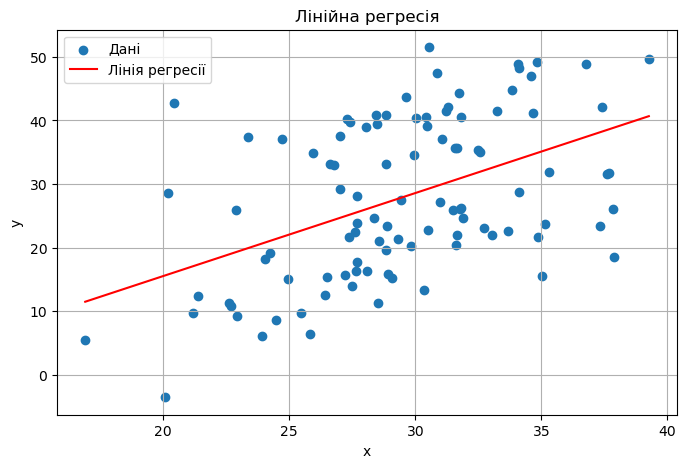

In [4]:
reg = LineRegression(x, y)

reg.print_equation()
reg.print_stats()
reg.plot()


In [5]:
# Прогнозуємо для нових x
new_x = [20, 25, 30, 35, 40]
predicted_y = reg.predict(new_x)

for xi, yi in zip(new_x, predicted_y):
    print(f"x = {xi} → y = {yi:.2f}")


x = 20 → y = 15.52
x = 25 → y = 22.05
x = 30 → y = 28.58
x = 35 → y = 35.10
x = 40 → y = 41.63



- Ми реалізували власний алгоритм лінійної регресії з нуля.
- Модель використовує математичне формулювання, а не ML-бібліотеки.
- Візуалізація підтвердила адекватність побудованої лінії.
- R² показує якість моделі: чим ближче до 1 — тим краще.
Такий проєкт підходить для портфоліо початківця-аналітика або Python-розробника.
